## Part 1: LSTM for Sequence Classification on the IMDB dataset

In a first exercise we want to build a model that can classify movie reviews as positive or negative based on their sentiment. To do so we train a model using the IMDB dataset. 

The IMDB dataset consists of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [1]:
import numpy as np
import numpy
# fix random seed so every student get the same results
numpy.random.seed(7)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

%matplotlib inline
from matplotlib import pyplot as plt

Using TensorFlow backend.


We need to load the IMDB dataset. We are constraining the dataset to the top 5,000 words. We also split the dataset into train (50%) and test (50%) sets.

In [2]:
# load the dataset but only keep the top n words, zero the rest
from keras.datasets import imdb
top_words = 5000
if 'X_train' not in locals():
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

17375232/17464789 [============================>.] - ETA: 0s(25000,) (25000,) (25000,) (25000,)


Next, we need to truncate and pad the input sequences so that they are all the same length for modeling. In this tutorial we use a maximum length of 100.

<b>Exercise 1</b>: 

To easily use an LSTM we need to truncate and pad the input sequences so that they are all of the same length. Create the training data by using the first 5.000 examples of X_train as training data and the first 5.000 examples of X_test as validation data. Use maxlen=100 to truncate all sequences to the same length.

The model will learn the zero values carry no information so indeed the sequences are not the same length in terms of content, but same length vectors is required to perform the computation in Keras.

In [3]:
from keras.preprocessing.sequence import pad_sequences
max_review_length = 100
AMOUNT = 5000

X_train = pad_sequences(X_train[:AMOUNT], maxlen=max_review_length)
X_test = pad_sequences(X_test[:AMOUNT], maxlen=max_review_length)
y_train = y_train[:AMOUNT]
y_test = y_test[:AMOUNT]

Check if evereything is correct

In [4]:
try:
    assert X_train.shape == (5000, 100)
    assert X_test.shape == (5000, 100)
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


We can now define, compile and fit our LSTM model.

The first layer is the embedded layer that uses 32 length vectors to represent
 each word. The next layer is the LSTM layer with 5 memory units (smart neurons). 
 Finally, because this is a classification problem we use a dense output 
 layer with a single neuron and a sigmoid activation function to make 0 or 1 
 predictions for the two classes (good or bad) in the problem.

Because it is a binary classification problem, log loss is used as the loss 
function (binary_crossentropy in Keras). The efficient ADAM optimization 
algorithm is used to do the gradient descent. 

In [5]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 760       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 160,766
Trainable params: 160,766
Non-trainable params: 0
_________________________________________________________________
None


<b>Exercise 2:</b>

Train a model for only 10 epochs and evaluate the model on the test data. Use a batch size of 64 reviews to update the weights in the LSTM net. Use X_test and y_test to validate the model.

In [6]:
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 8s - loss: 0.6843 - acc: 0.6094 - val_loss: 0.6586 - val_acc: 0.6694
Epoch 2/10
5000/5000 [==============================] - 8s - loss: 0.5332 - acc: 0.8096 - val_loss: 0.4830 - val_acc: 0.8138
Epoch 3/10
5000/5000 [==============================] - 8s - loss: 0.3661 - acc: 0.8940 - val_loss: 0.4364 - val_acc: 0.8204
Epoch 4/10
5000/5000 [==============================] - 8s - loss: 0.2763 - acc: 0.9268 - val_loss: 0.4446 - val_acc: 0.8000
Epoch 5/10
5000/5000 [==============================] - 8s - loss: 0.2196 - acc: 0.9468 - val_loss: 0.4408 - val_acc: 0.8082
Epoch 6/10
5000/5000 [==============================] - 8s - loss: 0.1785 - acc: 0.9572 - val_loss: 0.4605 - val_acc: 0.8054
Epoch 7/10
5000/5000 [==============================] - 8s - loss: 0.1454 - acc: 0.9684 - val_loss: 0.4868 - val_acc: 0.8072
Epoch 8/10
5000/5000 [==============================] - 8s - loss: 0.1246 - a

Once we fitted the model, we estimate the performance of the model on unseen reviews.

<b>Exercise 3:</b>

Evaluate the performance on the test set consisting of X_test and y_test and report the accuracy and use a ROC curve to show the performance of the model (Hint: use the 'evaluate' function to test the performance). What conclusions can you draw from the ROC curve?

In [7]:
model.evaluate(X_test, y_test, batch_size=batch_size)

4864/5000 [============================>.] - ETA: 0s

[0.55425304374694828, 0.79279999999999995]

4928/5000 [============================>.] - ETA: 0s

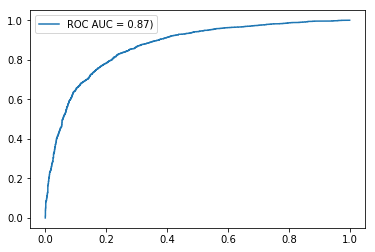

In [8]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC AUC = %0.2f)' % (roc_auc))
plt.legend()
plt.show()

The AUV score tells us that the probability of predicting a true positive is 87%.

You can see that this simple LSTM achieves good results on the IMDB problem. Importantly, this is a template that you can use to apply LSTM networks to your own sequence classification problems.

## Part 2: Generate sentences using LSTMs

In this part of the lab we are using a pretrained model (you can train the model on your own, but this will take some time). This model was trained to predict the next character given a sequence of 100 previous characters. This model can be used to generate new sentences/phrases. Your task is to use this model and generate sentences with it. The model was pretrained on a book called "wonderland".

First of all we want to load the data:

In [9]:
# load ascii text and covert to lowercase
filename = "wonderland.txt"
raw_text = open(filename, encoding="utf8").read()
raw_text = raw_text.lower()

Now that the book is loaded, we must prepare the data for modeling by the neural network. We cannot model the characters directly, instead we must convert the characters to integers.

We can do this easily by first creating a set of all of the distinct characters in the book, then creating a map of each character to a unique integer.

In [10]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

For example, the list of unique unicode sorted lowercase characters in the book is as follows:

In [11]:
print(chars)

['\n', ' ', '!', '#', '$', '%', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”', '\ufeff']


You can see that there may be some characters that we could remove to further clean up the dataset that will reduce the vocabulary and may improve the modeling process. In this lab we skip this process.

Now that the book has been loaded and the mapping prepared, we can summarize the dataset.

In [12]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: " + str(n_chars))
print("Total Vocab: " + str(n_vocab))

Total Characters: 163817
Total Vocab: 61


We can see that the book has just under 160,000 characters and that when converted to lowercase that there are only 61 distinct characters in the vocabulary for the network to learn.

We now need to define the training data for the network. There is a lot of flexibility in how you choose to break up the text and expose it to the network during training.

In this tutorial (as explained above) we will split the book text up into subsequences with a fixed length of 100 characters.

Each training pattern of the network is comprised of 100 time steps of one character (X) followed by one character output (y). When creating these sequences, we slide this window along the whole book one character at a time, allowing each character a chance to be learned from the 100 characters that preceded it.

For example, if the sequence length is 5 (for simplicity) then the first two training patterns would be as follows:

CHAPT -> E, HAPTE -> R

As we split up the book into these sequences, we convert the characters to integers using our lookup table we prepared earlier.

<b>Exercise 4:</b>

Create all patterns. Create a list of sequences dataX that contains all windows of the book and a list of following characters dataY. So each entry in the list dataX contains of a vector of 100 integer values representing the characters that occur in the window. Each entry in the list dataY contains the following character for the associated window in dataX.

Hint: Use the dictionary char_to_int to map the characters to integers. Look at the cell below to see an example entry of dataX and dataY.

Check if everything is correct:

In [13]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []

for i in range(len(raw_text)-seq_length):
    string_window = raw_text[i:i+seq_length]
    int_window = [char_to_int[s] for s in string_window]
    dataX.append(int_window)

dataY = [dataX[i+1][-1] for i in range(len(dataX)-1)]
dataY.append(char_to_int[raw_text[-1]])
assert len(dataX) == len(dataY), "Both are not equally long: {} and {}".format(len(dataX), len(dataY))

In [14]:
n_patterns = len(dataX)
try:
    assert n_patterns >= 163717, "n_patterns is {}".format(n_patterns)
    assert dataX[0] == [60, 45, 47, 44, 39, 34, 32, 49, 1, 36, 50, 49, 34, 43, 31, 34, 47, 36, 57, 48, 1, 30, 41, 38, 32, 34, 57, 48, 1, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 1, 38, 43, 1, 52, 44, 43, 33, 34, 47, 41, 30, 43, 33, 9, 1, 31, 54, 1, 41, 34, 52, 38, 48, 1, 32, 30, 47, 47, 44, 41, 41, 0, 0, 49, 37, 38, 48, 1, 34, 31, 44, 44, 40, 1, 38, 48, 1, 35, 44, 47, 1, 49, 37, 34, 1, 50, 48, 34, 1, 44], "dataX[0] is wrong"
    assert dataY[0] == 35, "dataY[0] is {}".format(dataY[0])
    print("Testing successful.")
except Exception as e:
    print("Tests failed: {}".format(e))

Testing successful.


Running the code to this point shows us that when we split up the dataset into training data for the network to learn that we have just under 160,000 training patterns. 

Now that we have prepared our training data we need to transform it so that it is suitable for use with Keras.

First we must transform the list of input sequences into the form [samples, features] expected by an LSTM network (if we would have more features per time step the dimension would be [samples, time_steps, features]).

Finally, we need to convert the output patterns (single characters converted to integers) into a one hot encoding. This is so that we can configure the network to predict the probability of each of the 61 different characters in the vocabulary (an easier representation) rather than trying to force it to predict precisely the next character. Each y value is converted into a sparse vector with a length of 61, full of zeros except with a 1 in the column for the letter (integer) that the pattern represents.

In [15]:
# reshape X to be [samples, time steps]
X = numpy.reshape(dataX, (n_patterns, seq_length))
# one hot encode the output variable
from keras.utils import np_utils
y = np_utils.to_categorical(dataY)

Now we can define our model. It consists of an embedding layer that embeds each character in a 32-dimensional feature space. The next layer is a layer with 256 LSTM units followed by a Dropout-Layer to reduce overfitting. The last layer is a Dense-Layer used to predict the probabilities for each of the 61 characters. 

In [16]:
embedding_vecor_length = 32
top_words = n_vocab
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=X.shape[1]))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           1952      
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               295936    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                15420     
Total params: 313,308
Trainable params: 313,308
Non-trainable params: 0
_________________________________________________________________
None


We can now fit our model to the data. Here we use a modest number of 20 epochs and a large batch size of 128 patterns.

In [17]:
# define the checkpoint
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

Training this model really takes some time. So you can skip the learning step and use the pretrained model instead.

In [18]:
#hist = model.fit(X, y, epochs=20, batch_size=128,callbacks=callbacks_list)

<b>Excercise 5</b>:
    
Use the weights stored in the file  "best_weights.hdf5" (model with the best weights) and compile the model.

In [19]:
#hist = model.fit(X, y, epochs=20, batch_size=128,callbacks=callbacks_list)

# load the network weights
filename = "best_weights.hdf5"
model.load_weights(filename)

<b>Exercise 6:</b>
    
Also, when preparing the mapping of unique characters to integers, we must also create a reverse mapping that we can use to convert the integers back to characters so that we can understand the predictions. Create a mapping from the integers to the characters as we did by defining the dictionary char_to_int.

In [20]:
# YOUR CODE GOES HERE
int_to_char = {v: k for k, v in char_to_int.items()}

Finally, we need to actually make predictions.

The simplest way to use the Keras LSTM model to make predictions is to first start off with a seed sequence as input, generate the next character then update the seed sequence to add the generated character on the end and trim off the first character. This process is repeated for as long as we want to predict new characters (e.g. a sequence of 100 characters in length).

We can pick a random input pattern as our seed sequence, then print generated characters as we generate them.

<b>Exercise 7:</b>
    
Use the pretrained (our your own trained) LSTM and predict the next 100 characters using a random sequence as starting point. How could you easily obtain different predictions for the next character?

In [21]:
# Excercise
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print(''.join([int_to_char[value] for value in pattern]))

# generate characters
for i in range(max_review_length):
    x = numpy.reshape(pattern, (1, len(pattern)))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
    
print("prediction: ")
print("".join([int_to_char[i] for i in pattern]))
print("\nDone.")

Seed:
eshire puss,’ she began, rather timidly, as she did not at all know
whether it would like the name: 
prediction: 
‘it’s a founderation of the sea.

                                                                  

Done.


<b>Exercise 8:</b>
    
Use a sentence with at least 100 characters created by your own and look at the next predicted 100 characters. How does the prediction look like?

In [22]:
sentence = "This sentence contains exactly onehundred words. Coincidence? I think not! Follow the white rabbit..".lower()
assert len(sentence) == 100, len(sentence)
pattern = [char_to_int[c] for c in sentence]

for i in range(max_review_length):
    x = numpy.reshape(pattern, (1, len(pattern)))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
    
print("prediction: ")
print("".join([int_to_char[i] for i in pattern]))
print("\nDone.")

prediction: 


‘i shall have to be off, and the moral of the most way i think?’ said alice.

‘it was a little bes

Done.
